In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.stats import norm
import h5py

<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Anwender\AppData\Local\Temp\ipykernel_17112\2642699604.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, norm.pdf(x, mu, std)*wf, 'r-', label=f'Gaussian fit\n$\mu$={mu:.2f} ns, $\sigma$={std:.2f} ns')
C:\Users\Anwender\AppData\Local\Temp\ipykernel_17112\2642699604.py:37: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, norm.pdf(x, mu, std)*wf, 'r-', label=f'Gaussian fit\n$\mu$={mu:.2f} ns, $\sigma$={std:.2f} ns')


(60293, 350)


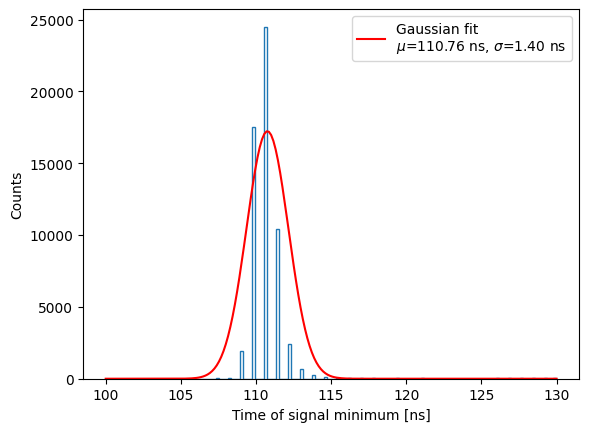

Gaussian fit standard deviation (sigma): 1.3958 ns
4.930286803775644
(55426, 350)


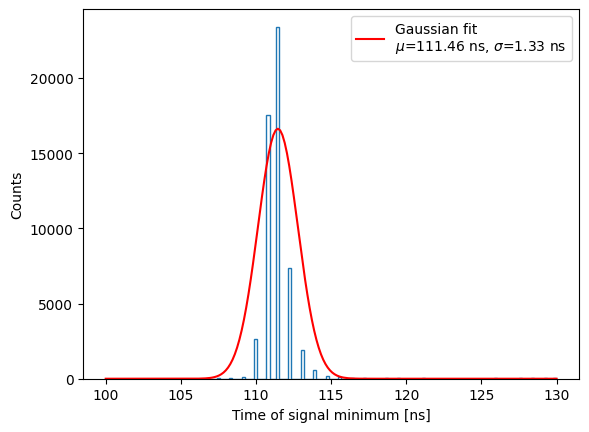

Gaussian fit standard deviation (sigma): 1.3297 ns
4.696714703938822
(65913, 350)


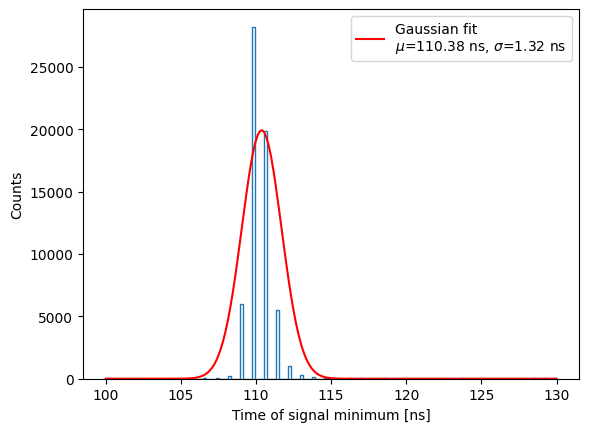

Gaussian fit standard deviation (sigma): 1.3200 ns
4.66259300186141
(63423, 350)


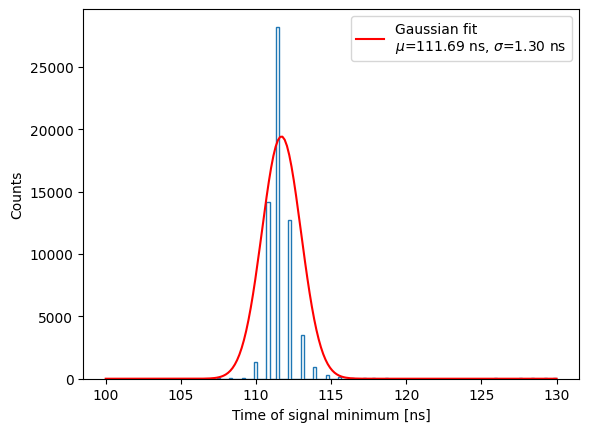

Gaussian fit standard deviation (sigma): 1.3013 ns
4.596454657742334
(47473, 350)


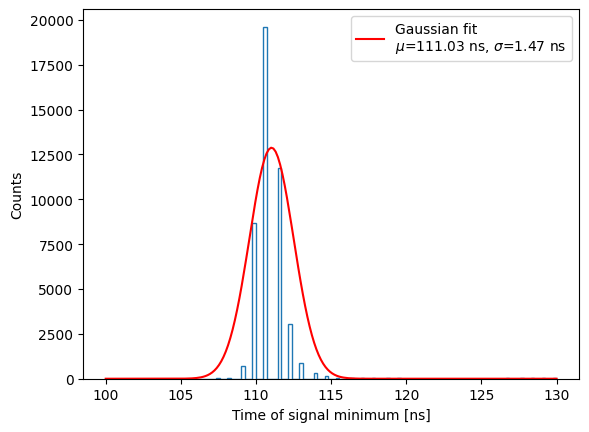

Gaussian fit standard deviation (sigma): 1.4709 ns
5.195728163529292
(65539, 350)


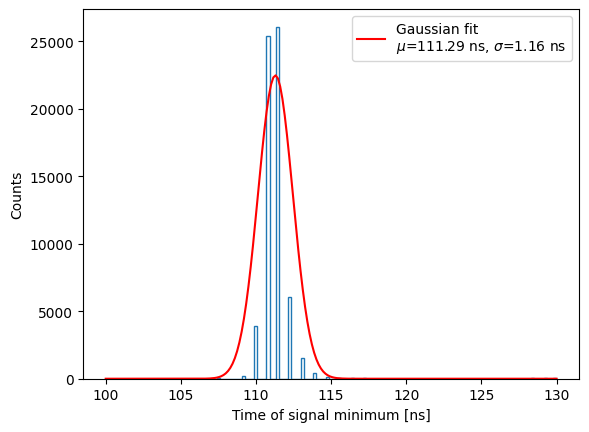

Gaussian fit standard deviation (sigma): 1.1631 ns
4.108325903777501
(67754, 350)


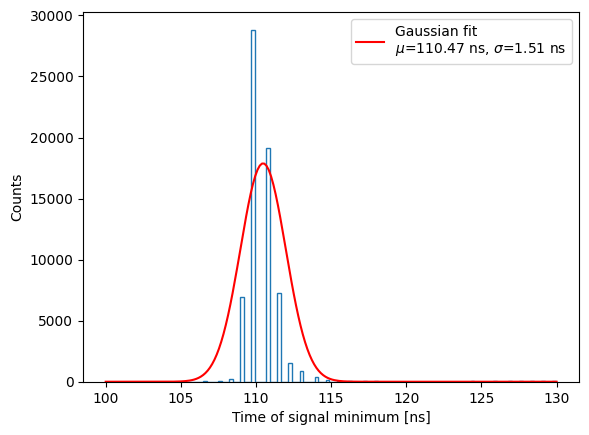

Gaussian fit standard deviation (sigma): 1.5110 ns
5.337033099300454
(46242, 350)


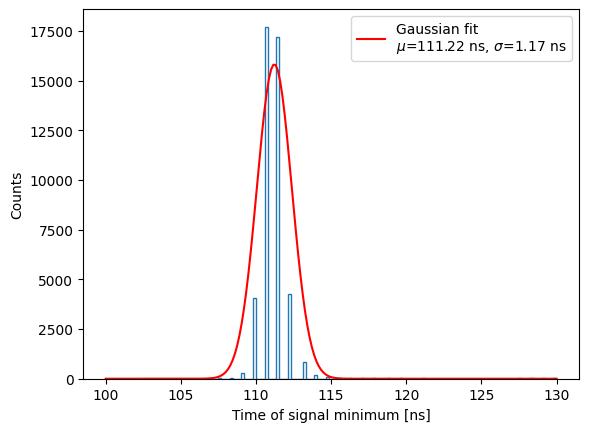

Gaussian fit standard deviation (sigma): 1.1652 ns
4.115609404484863
(66914, 350)


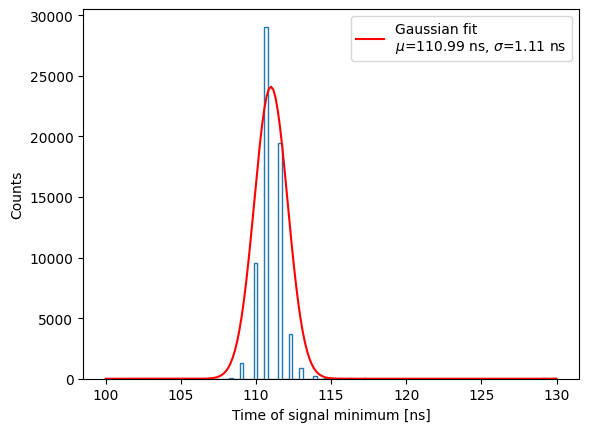

Gaussian fit standard deviation (sigma): 1.1078 ns
3.913093803029331
(60999, 350)


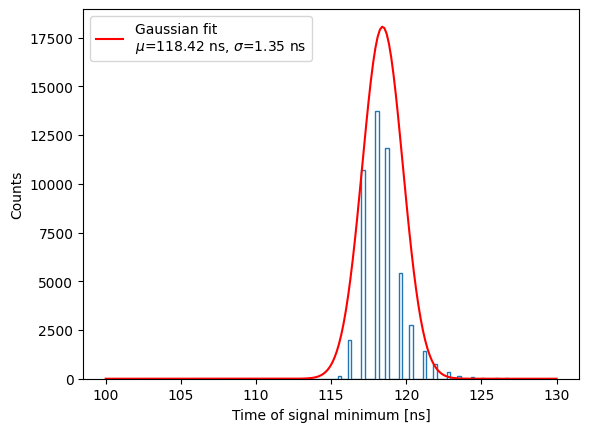

Gaussian fit standard deviation (sigma): 1.3473 ns
4.759043957091965


In [48]:
pmts=[1,2,3,9,10,12,14,18,19,"4inch"]
tts_list=[]
for pmt in pmts:
    f = h5py.File(f'C:/Users/Anwender/Documents/TUM/Masterarbeit/Programming/new_PMTs/pmt{pmt}.hdf5', 'r')
    key=list(f.keys()) #Listing either the HV or tune of the laser 

    dset=f[key[0]]
    time=dset['dataset'][:,:,0]
    signal=dset['dataset'][:,:,1]
    ref_sgnal=dset['dataset'][:,:,2]
    trigger=dset['dataset'][:,:,3]

    print(np.shape(signal))
    trigger_val=-100
    new_time=np.zeros(np.shape(time))
    for i in range(0,np.shape(signal)[0]):
        trigger_index = np.flatnonzero((trigger[i][:-1] > trigger_val) & (trigger[i][1:] < trigger_val))[0]
        new_time[i]=time[i]-time[i][trigger_index]
        #plt.plot(new_time[i],signal[i],label="corrected waveform")

    wf=np.shape(signal)[0]
    min_times = []
    for i in range(np.shape(signal)[0]):
        min_idx = np.argmin(signal[i])
        t_min = new_time[i][min_idx]
        if 100 <= t_min <= 130:
            min_times.append(t_min)

    plt.figure()
    counts, bins, _ = plt.hist(min_times, bins=120, histtype='step')
    plt.xlabel("Time of signal minimum [ns]")
    plt.ylabel("Counts")
    
    # Fit with a Gaussian
    mu, std = norm.fit(min_times)
    x = np.linspace(100, 130, 200)
    plt.plot(x, norm.pdf(x, mu, std)*wf, 'r-', label=f'Gaussian fit\n$\mu$={mu:.2f} ns, $\sigma$={std:.2f} ns')
    plt.legend()
    plt.show()

    print(f"Gaussian fit standard deviation (sigma): {std:.4f} ns")
    tts=3*np.sqrt(2*np.log(2))*std
    print(tts)
    tts_list.append(tts)


<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Anwender\AppData\Local\Temp\ipykernel_17112\863524661.py:43: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf, 'r-', label=f'Gaussian Fit\n$\mu$={mu:.2f} ns, $\sigma$={std:.2f} ns')
C:\Users\Anwender\AppData\Local\Temp\ipykernel_17112\863524661.py:43: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, 'r-', label=f'Gaussian Fit\n$\mu$={mu:.2f} ns, $\sigma$={std:.2f} ns')


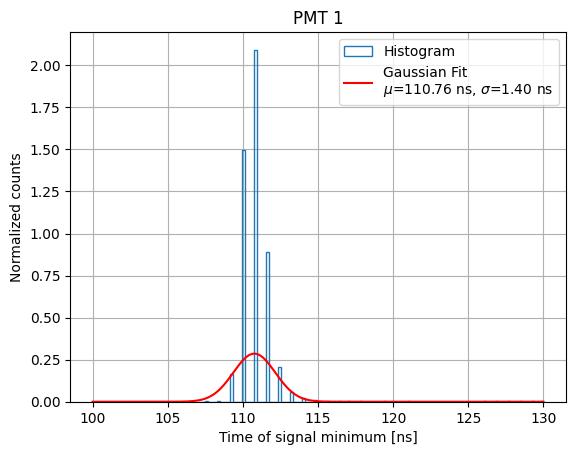

PMT 1: Gaussian fit standard deviation (sigma): 1.3958 ns
PMT 1: TTS = 4.9303 ns


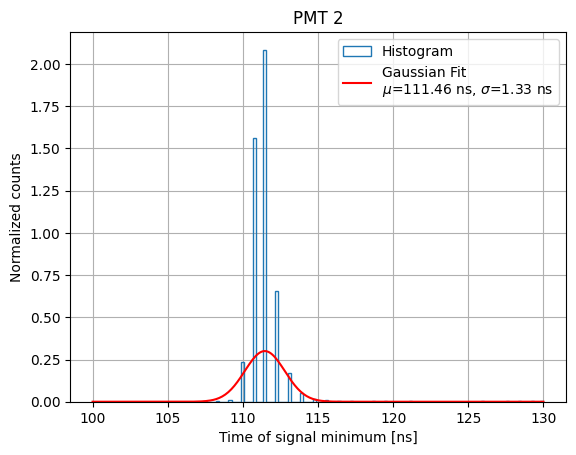

PMT 2: Gaussian fit standard deviation (sigma): 1.3297 ns
PMT 2: TTS = 4.6967 ns


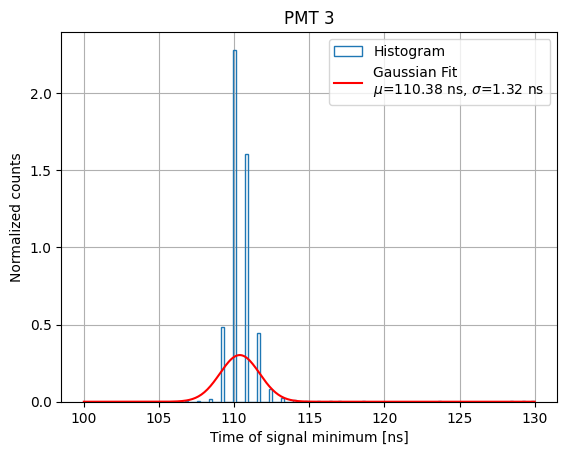

PMT 3: Gaussian fit standard deviation (sigma): 1.3200 ns
PMT 3: TTS = 4.6626 ns


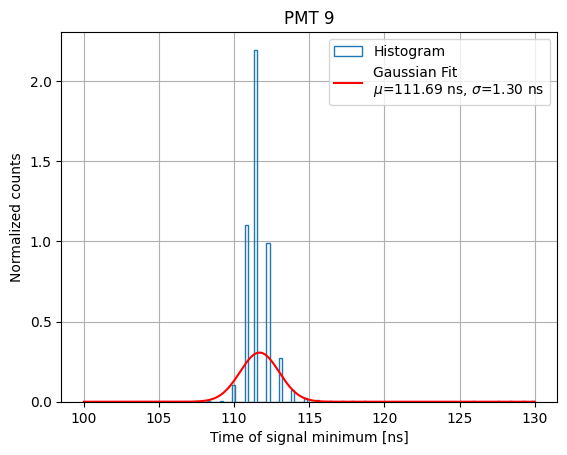

PMT 9: Gaussian fit standard deviation (sigma): 1.3013 ns
PMT 9: TTS = 4.5965 ns


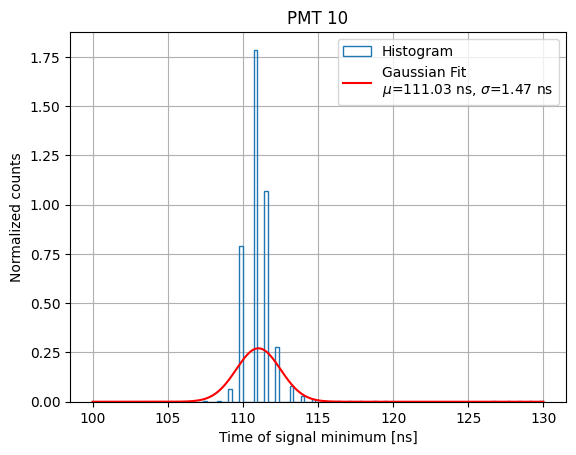

PMT 10: Gaussian fit standard deviation (sigma): 1.4709 ns
PMT 10: TTS = 5.1957 ns


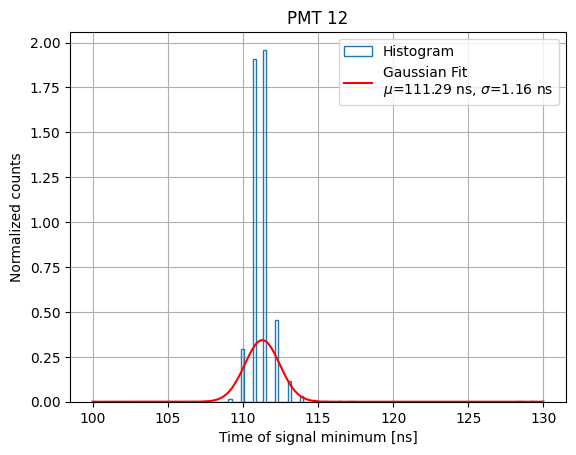

PMT 12: Gaussian fit standard deviation (sigma): 1.1631 ns
PMT 12: TTS = 4.1083 ns


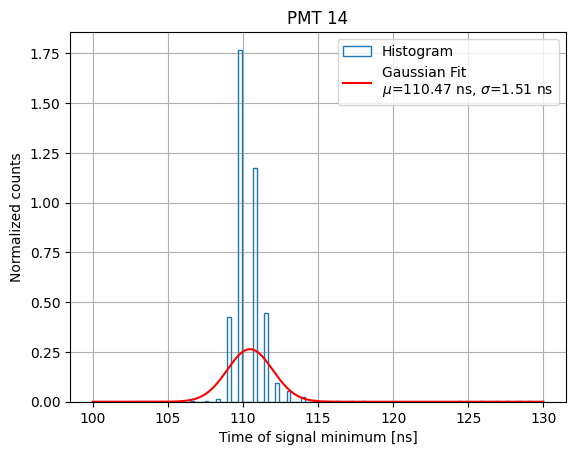

PMT 14: Gaussian fit standard deviation (sigma): 1.5110 ns
PMT 14: TTS = 5.3370 ns


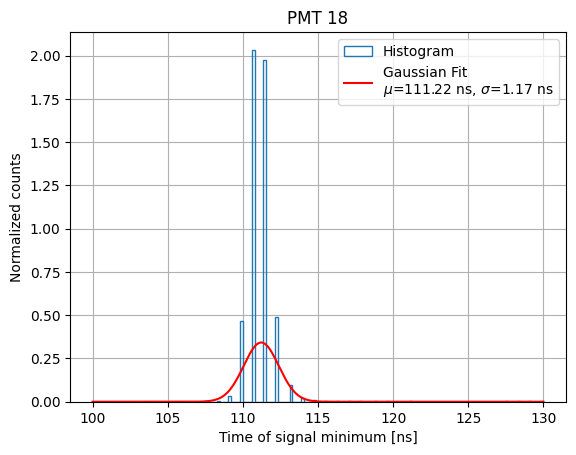

PMT 18: Gaussian fit standard deviation (sigma): 1.1652 ns
PMT 18: TTS = 4.1156 ns


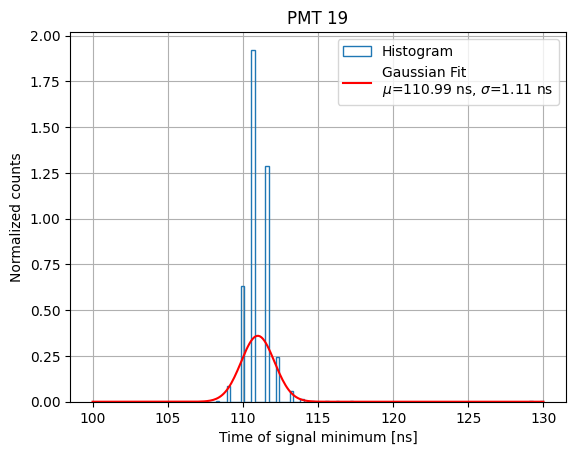

PMT 19: Gaussian fit standard deviation (sigma): 1.1078 ns
PMT 19: TTS = 3.9131 ns


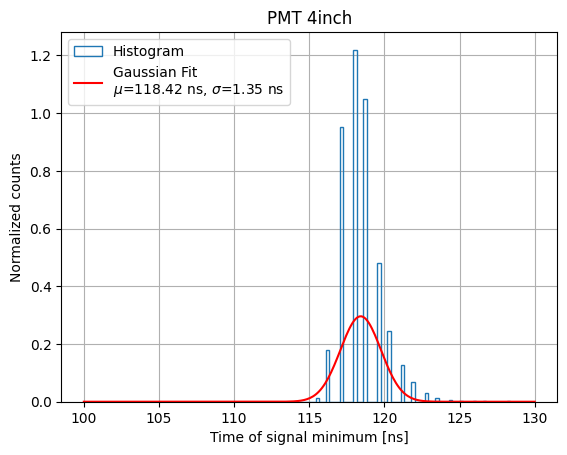

PMT 4inch: Gaussian fit standard deviation (sigma): 1.3473 ns
PMT 4inch: TTS = 4.7590 ns


In [49]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

pmts = [1, 2, 3, 9, 10, 12, 14, 18, 19, "4inch"]
tts_list = []

for pmt in pmts:
    # Open the HDF5 file
    f = h5py.File(f'C:/Users/Anwender/Documents/TUM/Masterarbeit/Programming/new_PMTs/pmt{pmt}.hdf5', 'r')
    key = list(f.keys())
    
    # Read data arrays
    dset = f[key[0]]
    time = dset['dataset'][:, :, 0]
    signal = dset['dataset'][:, :, 1]
    trigger = dset['dataset'][:, :, 3]
    
    # Time alignment based on trigger crossing
    trigger_val = -100
    new_time = np.zeros_like(time)
    for i in range(signal.shape[0]):
        trigger_index = np.flatnonzero((trigger[i][:-1] > trigger_val) & (trigger[i][1:] < trigger_val))[0]
        new_time[i] = time[i] - time[i][trigger_index]
    
    # Collect times of signal minima within valid window
    min_times = []
    for i in range(signal.shape[0]):
        min_idx = np.argmin(signal[i])
        t_min = new_time[i][min_idx]
        if 100 <= t_min <= 130:
            min_times.append(t_min)
    
    # Histogram and Gaussian fit
    plt.figure()
    counts, bins, _ = plt.hist(min_times, bins=120, density=True, histtype='step', label="Histogram")
    
    # Fit Gaussian
    mu, std = norm.fit(min_times)
    x = np.linspace(100, 130, 300)
    pdf = norm.pdf(x, mu, std)
    plt.plot(x, pdf, 'r-', label=f'Gaussian Fit\n$\mu$={mu:.2f} ns, $\sigma$={std:.2f} ns')
    
    # Labels and plot
    plt.xlabel("Time of signal minimum [ns]")
    plt.ylabel("Normalized counts")
    plt.title(f"PMT {pmt}")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Compute TTS
    print(f"PMT {pmt}: Gaussian fit standard deviation (sigma): {std:.4f} ns")
    tts = 3 * np.sqrt(2 * np.log(2)) * std
    print(f"PMT {pmt}: TTS = {tts:.4f} ns")
    tts_list.append(tts)


Text(0.5, 0, 'PMT number')

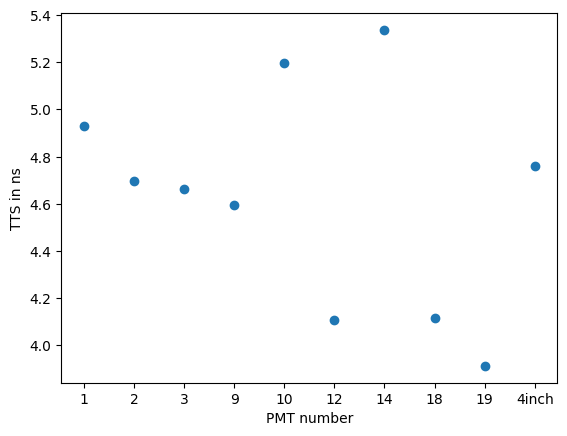

In [45]:
plt.scatter([str(p) for p in pmts], tts_list)
plt.ylabel("TTS in ns")
plt.xlabel("PMT number")